# Boston Housing Dataset

### Предметная область
Недвижимость в пригородах Бостона

### Источник данных
Набор данных Boston Housing  
https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data

**Первоисточник:**  
Харрисон, Д. и Рубинфельд, Д. Л. «Гедонистические цены и спрос на чистый воздух»  
J. Environ. Economics & Management, т. 5, стр. 81–102, 1978 г.

### Характер данных
Реальные данные

#  ИНФОРМАЦИЯ ОБ АТРИБУТАХ ДАТАСЕТА BOSTON HOUSING

## Входные данные (14 атрибутов):

| № | Атрибут | Описание | Единицы измерения |
|---|---------|----------|-------------------|
| 1 | **CRIM** | Уровень преступности на душу населения в городе | случаи на душу населения |
| 2 | **ZN** | Доля жилых земель, отнесенных к категории участков площадью более 25 000 кв. футов | % |
| 3 | **INDUS** | Доля нерозничных коммерческих акров в городе | % |
| 4 | **CHAS** | Фиктивная переменная реки Чарльз (1 - если участок граничит с рекой; 0 - в противном случае) | бинарная (0/1) |
| 5 | **NOX** | Концентрация оксидов азота | частиц на 10 миллионов |
| 6 | **RM** | Среднее количество комнат в жилище | комнат |
| 7 | **AGE** | Доля единиц жилья, занимаемых владельцами, построенных до 1940 года | % |
| 8 | **DIS** | Взвешенные расстояния до пяти бостонских центров занятости | условные единицы |
| 9 | **RAD** | Индекс доступности к радиальным магистралям | индекс |
| 10 | **TAX** | Ставка налога на имущество с полной стоимостью | $ за 10 000 стоимости |
| 11 | **PTRATIO** | Соотношение учеников и учителей по городам | учеников на учителя |
| 12 | **B** | Результат уравнения B = 1000(Bk - 0,63)², где Bk — доля чернокожих по городам | расчётный показатель |
| 13 | **LSTAT** | Процент населения с низким статусом | % |
| 14 | **MEDV** | Медианная стоимость домов, занимаемых владельцами | тысячи долларов США |

---

##  Целевая переменная:
- **MEDV** - Медианная стоимость домов (тыс. $)

##  Типы данных:
- **Все атрибуты** представлены в числовом виде
- **CHAS** - единственная категориальная (бинарная) переменная
- **Остальные атрибуты** - непрерывные числовые переменные

---

###  Примечание:
Датасет содержит информацию о 506 районах Бостона и используется для прогнозирования стоимости жилья на основе различных социально-экономических и физических характеристик.

##  Выполнение работы


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('boston.csv')

## Среднее значение и СКО атрибутов

In [21]:
stats_df = pd.DataFrame({
    'Среднее': df.mean(),
    'Стандартное_отклонение': df.std()
})
stats_df

,Среднее,Стандартное_отклонение
CRIM,3.613524,8.601545
ZN,11.363636,23.322453
INDUS,11.136779,6.860353
CHAS,0.069170,0.253994
NOX,0.554695,0.115878
RM,6.284634,0.702617
AGE,68.574901,28.148861
DIS,3.795043,2.105710
RAD,9.549407,8.707259
TAX,408.237154,168.537116


## Гистограмма распределения значений

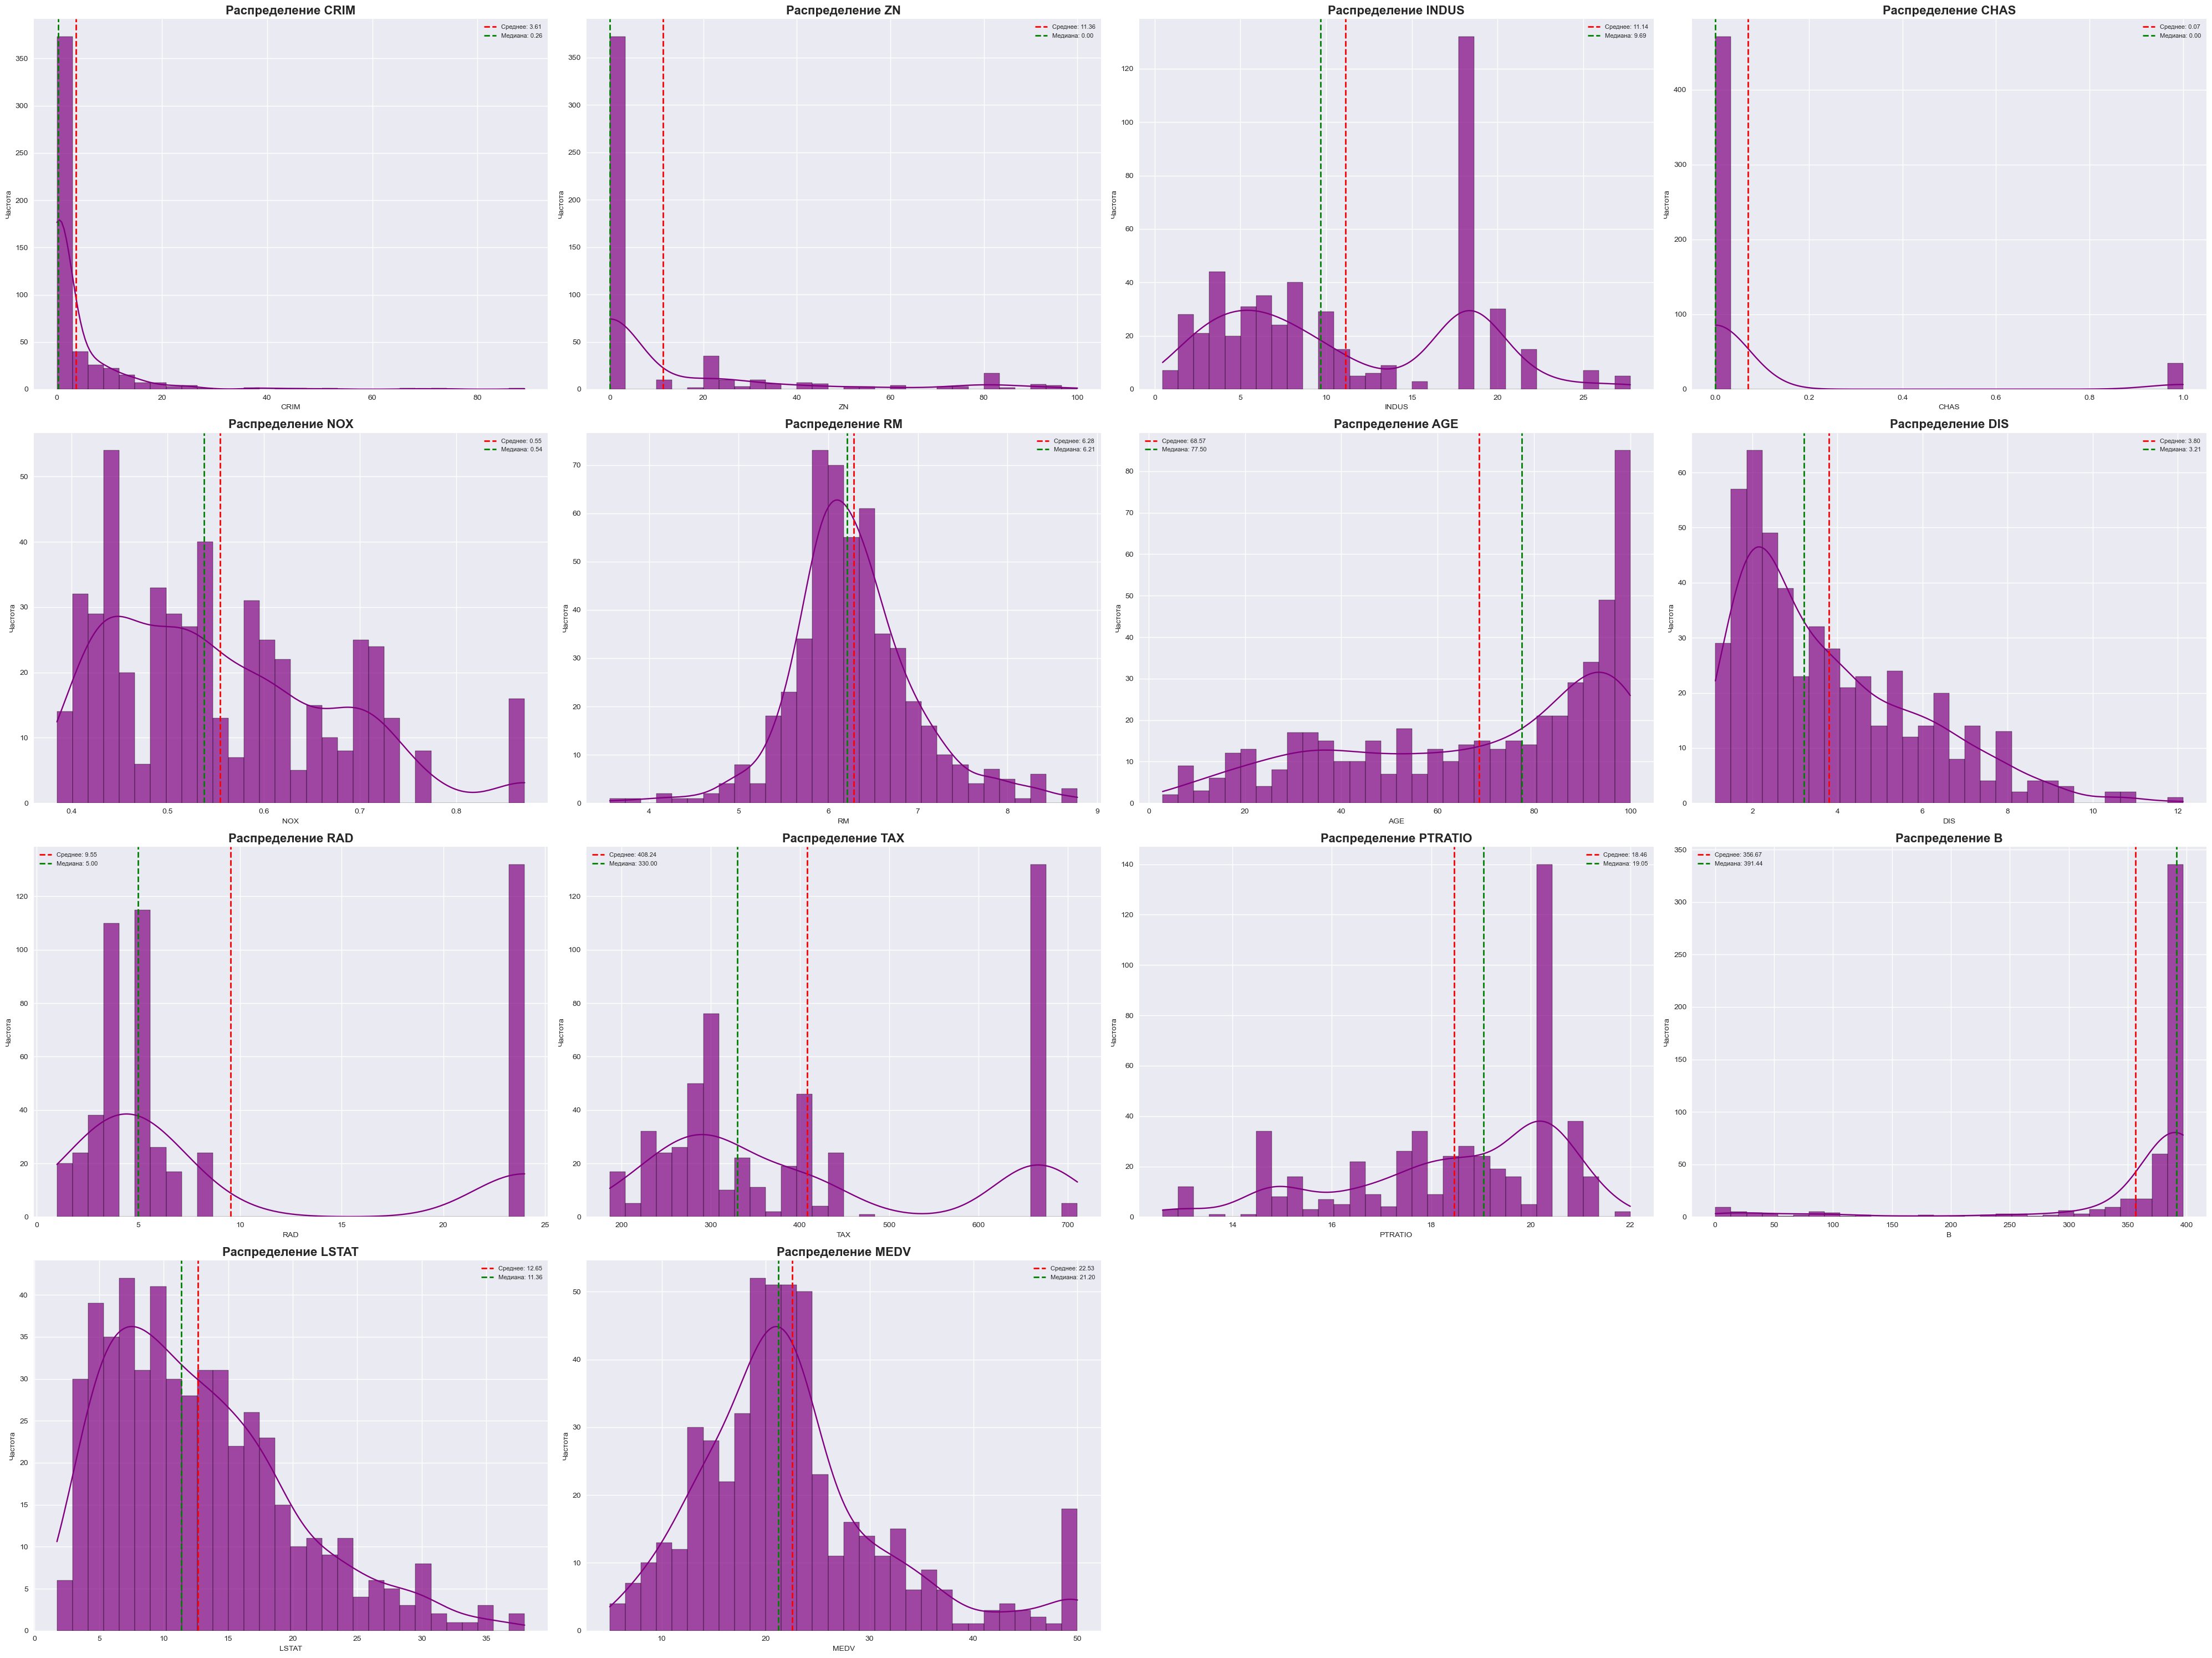

In [18]:
num_columns = df.columns.tolist()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

fig, axes = plt.subplots(4, 4, figsize=(40, 30))
axes = axes.flatten()

for i, column in enumerate(num_columns):
    if i >= len(axes):
        break
        
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30, color='purple', alpha=0.7)
    
    axes[i].set_title(f'Распределение {column}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Частота', fontsize=10)
    
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    
    axes[i].legend(fontsize=8)

for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


## Определение наличия выбросов


In [24]:
outlier_summary = []
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percent = len(outliers) / len(df) * 100
    
    outlier_summary.append({
        'Атрибут': column,
        'Выбросы (кол-во)': len(outliers),
        'Выбросы (%)': f'{outlier_percent:.2f}%',
        'Нижняя граница': lower_bound,
        'Верхняя граница': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Сводка по выбросам:")
print(outlier_df)

Сводка по выбросам:
    Атрибут  Выбросы (кол-во) Выбросы (%)  Нижняя граница  Верхняя граница
0      CRIM                66      13.04%       -5.310511         9.069639
1        ZN                68      13.44%      -18.750000        31.250000
2     INDUS                 0       0.00%      -14.175000        37.465000
3      CHAS                35       6.92%        0.000000         0.000000
4       NOX                 0       0.00%        0.186500         0.886500
5        RM                30       5.93%        4.778500         7.730500
6       AGE                 0       0.00%      -28.550000       167.650000
7       DIS                 5       0.99%       -2.532200         9.820800
8       RAD                 0       0.00%      -26.000000        54.000000
9       TAX                 0       0.00%     -301.500000      1246.500000
10  PTRATIO                15       2.96%       13.200000        24.400000
11        B                77      15.22%      344.106250       427.496250
12   

## Проверка и обработка упущенных значений

In [25]:
print(f"Общее количество пропущенных значений: {df.isnull().sum().sum()}")
print(f"Процент пропущенных значений: {df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100:.2f}%")

Общее количество пропущенных значений: 0
Процент пропущенных значений: 0.00%


## Определение корреляции между параметрами

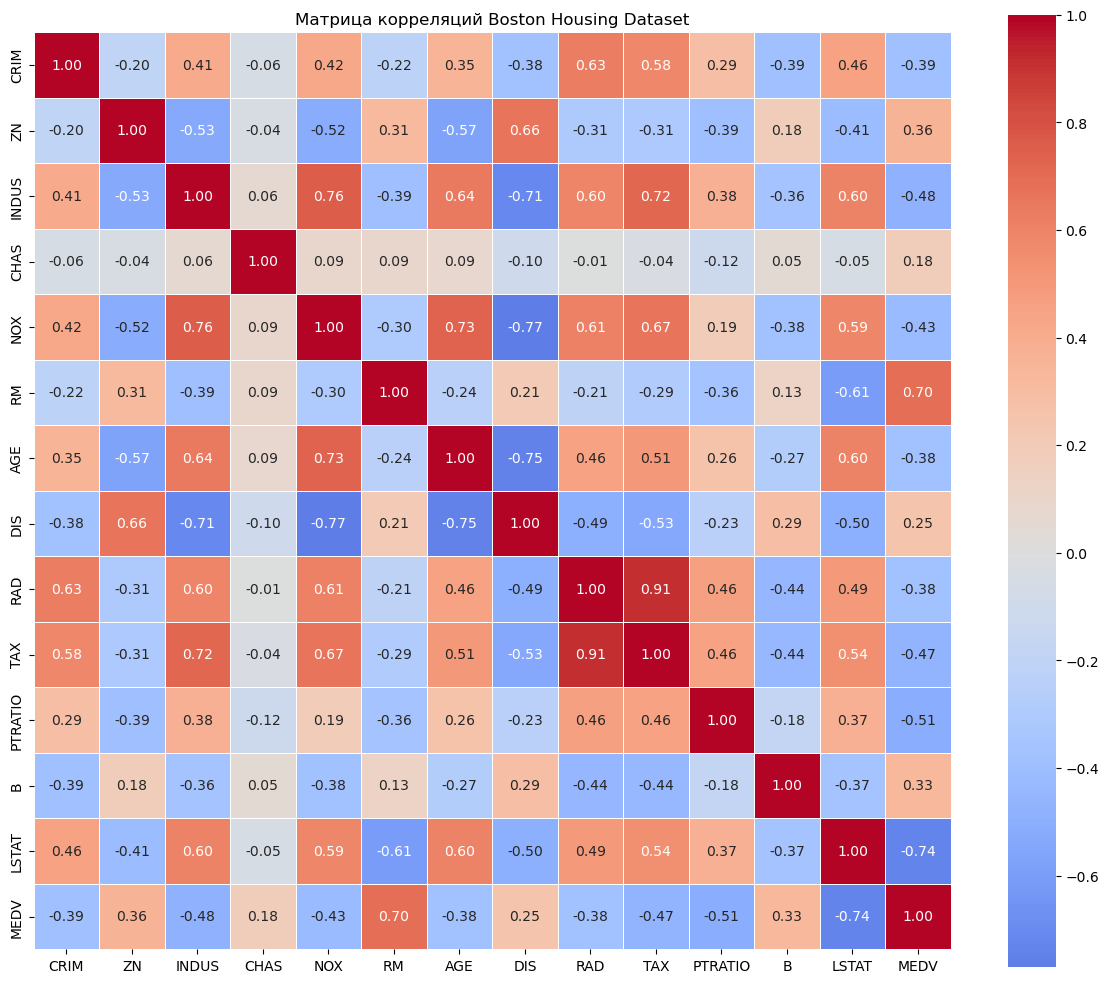

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5)
plt.title('Матрица корреляций Boston Housing Dataset')
plt.tight_layout()
plt.show()

## Высококоррелированные атрибуты

In [6]:
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Признак 1': correlation_matrix.columns[i],
                'Признак 2': correlation_matrix.columns[j],
                'Корреляция': correlation_matrix.iloc[i, j],
                'Характер': 'Положительная' if correlation_matrix.iloc[i, j] > 0 else 'Отрицательная'
            })

high_corr_df = pd.DataFrame(high_corr_pairs)
high_corr_df = high_corr_df.sort_values('Корреляция', key=abs, ascending=False)

print("Высококоррелированные пары признаков (|r| > 0.7):")
print("=" * 70)
print(high_corr_df.to_string(index=False))

Высококоррелированные пары признаков (|r| > 0.7):
Признак 1 Признак 2  Корреляция      Характер
      RAD       TAX    0.910228 Положительная
      NOX       DIS   -0.769230 Отрицательная
    INDUS       NOX    0.763651 Положительная
      AGE       DIS   -0.747881 Отрицательная
    LSTAT      MEDV   -0.737663 Отрицательная
      NOX       AGE    0.731470 Положительная
    INDUS       TAX    0.720760 Положительная
    INDUS       DIS   -0.708027 Отрицательная


## Оченнь слабая корреляция

In [7]:
low_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < 0.1:  
            low_corr_pairs.append({
                'Признак 1': correlation_matrix.columns[i],
                'Признак 2': correlation_matrix.columns[j],
                'Корреляция': corr_value,
                'Характер': 'Положительная' if corr_value > 0 else 'Отрицательная'
            })

low_corr_df = pd.DataFrame(low_corr_pairs)
low_corr_df = low_corr_df.sort_values('Корреляция', key=abs, ascending=False)

print("Пары признаков со слабой корреляцией (|r| < 0.1):")
print("=" * 70)
print(low_corr_df.to_string(index=False))

Пары признаков со слабой корреляцией (|r| < 0.1):
Признак 1 Признак 2  Корреляция      Характер
     CHAS       DIS   -0.099176 Отрицательная
     CHAS        RM    0.091251 Положительная
     CHAS       NOX    0.091203 Положительная
     CHAS       AGE    0.086518 Положительная
    INDUS      CHAS    0.062938 Положительная
     CRIM      CHAS   -0.055892 Отрицательная
     CHAS     LSTAT   -0.053929 Отрицательная
     CHAS         B    0.048788 Положительная
       ZN      CHAS   -0.042697 Отрицательная
     CHAS       TAX   -0.035587 Отрицательная
     CHAS       RAD   -0.007368 Отрицательная


## Матрица графиков рассеивания

<Figure size 1400x1200 with 0 Axes>

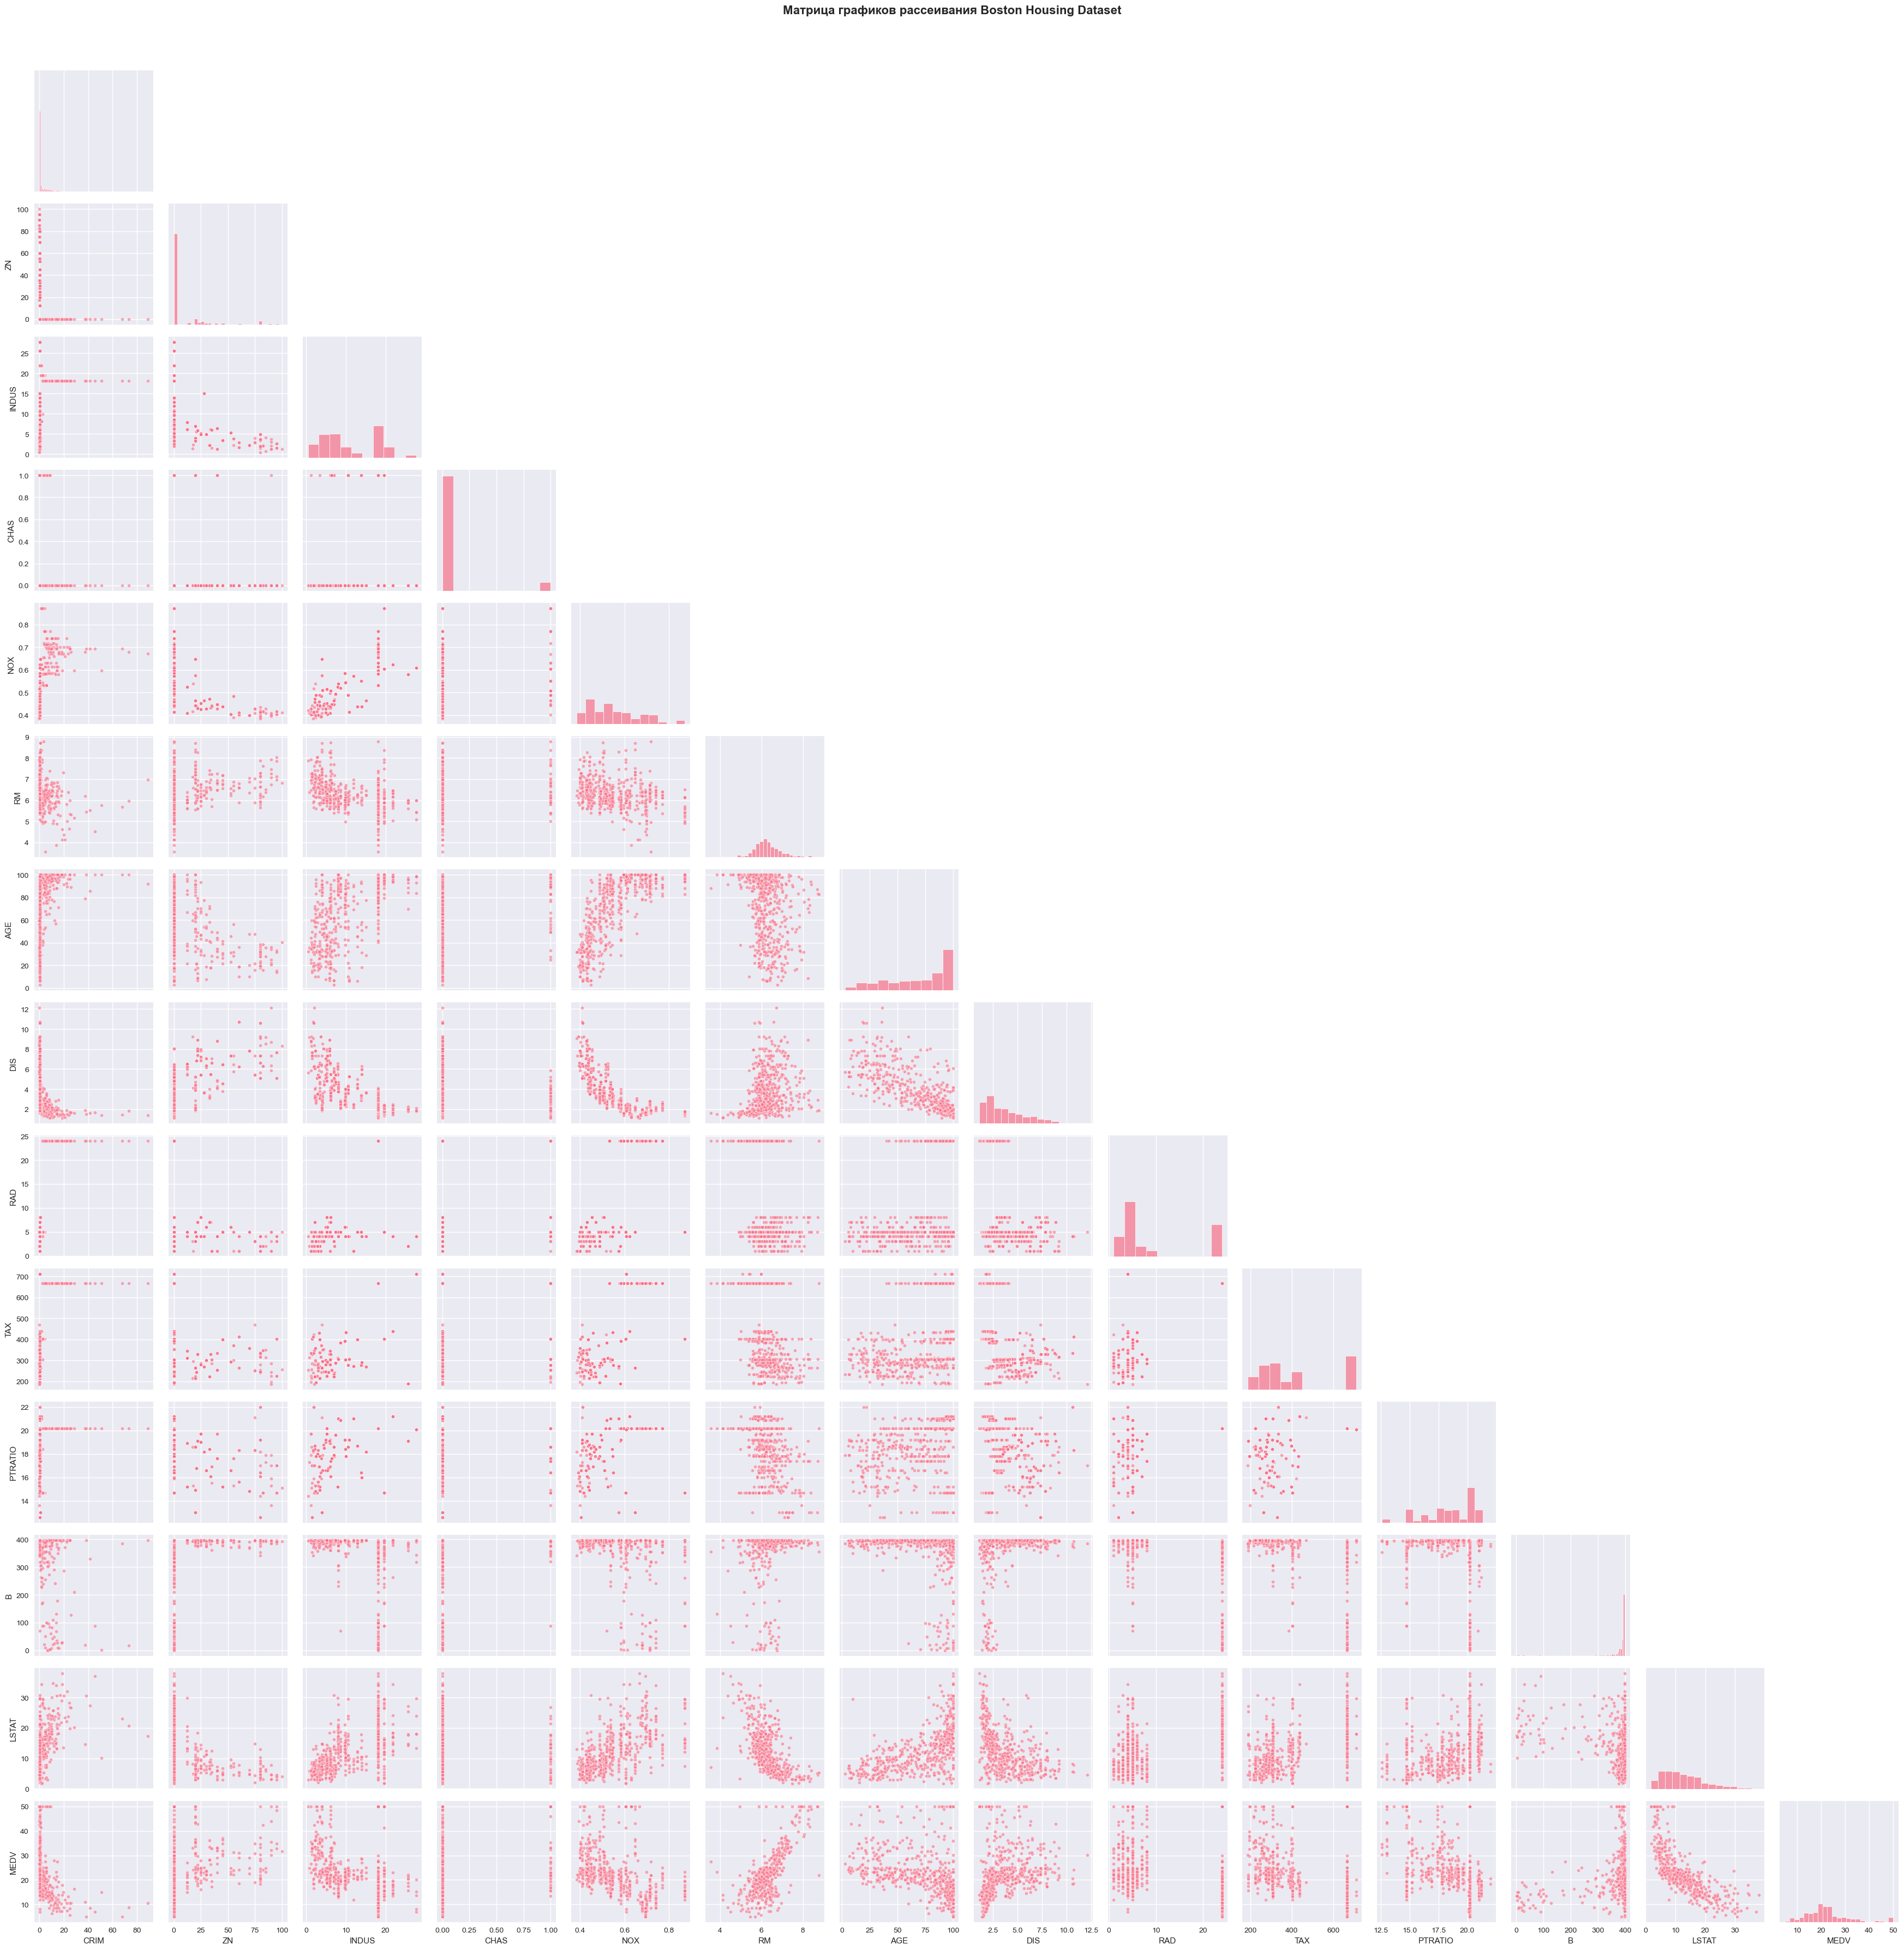

In [12]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

plt.figure(figsize=(14, 12))

g = sns.pairplot(df, 
                 diag_kind='hist', 
                 corner=True,
                 plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'w', 'linewidth': 0.5},
                 diag_kws={'alpha': 0.7, 'edgecolor': 'w', 'linewidth': 0.5})

plt.suptitle('Матрица графиков рассеивания Boston Housing Dataset', 
             y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Анализ полученных данных

Проведенный анализ данных показал четкую зависимость стоимости жилья в пригородах Бостона от различных социально-экономических, демографических и физических факторов. Среди наиболее важных переменных, влияющих на медианную стоимость жилья (MEDV), можно выделить: уровень дохода населения (LSTAT), среднее количество комнат (RM), уровень преступности (CRIM), ставка налога на имущество (TAX) и степень загрязнения воздуха оксидами азота (NOX).

Результаты анализа и графики показывают наличие устойчивых связей между изучаемыми показателями. В частности, наблюдается обратная зависимость между стоимостью жилья и уровнем бедности, а также прямая связь с качеством жилья (количество комнат). Эти закономерности подтверждают, что ценообразование на рынке жилья зависит не только от физических параметров недвижимости, но и от социально-экономической ситуации в районе.

Таким образом, полученные результаты свидетельствуют о необходимости учитывать множество взаимосвязанных факторов при прогнозировании стоимости жилья и разработке жилищной политики. Комплексный подход, учитывающий как материальные, так и социальные аспекты, позволяет более точно оценивать рынок недвижимости и принимать обоснованные решения в области городского планирования.